In [1]:
import numpy as np
import pandas as pd

# Import Data

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation/customer.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Menentukan jumlah cluster

## K-modes (kategorik) & K-means (numerik) = `K-prototype`

In [5]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

  0%|          | 0/8 [00:00<?, ?it/s]

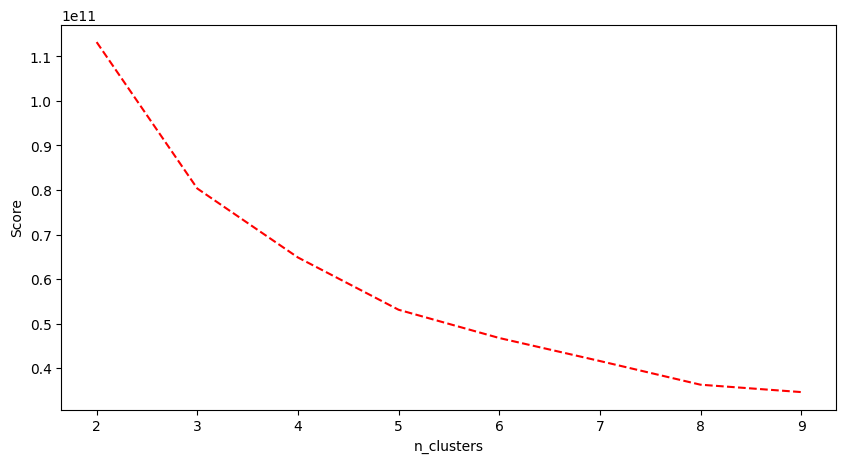

In [8]:
score = []
for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k)
    model.fit(df, categorical=[0, 1]) # index kolom kategorikal pada kolom 0 dan 1
    score.append(model.cost_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), score, 'r--')
plt.ylabel('Score')
plt.xlabel('n_clusters');

# Training

In [9]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0, 1])

In [10]:
df_pred = df.copy()
df_pred['cluster'] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


# Analyze Cluster

In [15]:
centroids = model.cluster_centroids_

df_centroids = pd.DataFrame(centroids, columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Channel', 'Region'])

df_centroids[['Channel', 'Region']] = df_centroids[['Channel', 'Region']].astype(int)
df_centroids

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000,2,3
1,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970,1,3
2,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667,1,3


In [16]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

# Conclusion:
### Cluster 0: `Orang hemat` (di bawah rata-rata belanja barang)
### Cluster 1: `Typical orang yang belanja milk, grocery, dan detergents` (milk, grocery, dan detergents jauh di atas rata-rata)
### Cluster 2 : `Customer yang suka belanja fresh food` (fresh food` signifikan di atas rata-rata)

# Tambahan: Popular conventional approach
Melakukan customer segementation dengan tier sederhana memanfaatkan **RFM (Recency - Frequency - Monetary)** dengan menambahkan kolom-kolom berikut:
- Recency = seberapa recent transaksinya (customer aktif)
- Frequency = seberapa sering transaksinya (customer loyal)
- Monetary = seberapa besar transaksinya